# Curso de Data Science - UTN
## Introducción
En el presente trabajo se analizará el siguiente archivo de datos: ***number-of-deaths-by-risk-factor.csv***
El mismo fue obtenido de ***www.kaggle.com***

El objetivo del presente análisis consiste en detectar las principales causas de muerte en niños entre 0 y 4 años en Argentina, comparando las mismas a lo largo de los años de datos recopilados, y con datos del resto del mundo. 

Se procurará identificar las principales causas en distintas épocas, y según si los países son desarrollados o no.

Los campos del dataset son los siguientes:

* 0   Entity: designa el país
* 1   Year: identifica el año del dato
* 2   Unsafe water source: cantidad de muertes por fuente de agua insegura
* 3   Unsafe sanitation: cantidad de muertes por saneamiento inseguro, ausencia de cloacas 
* 4   No access to handwashing facility: cantidad de muertes por falta de acceso al lavado de manos
* 5   Household air pollution from solid fuels: cantidad de muertes por contaminación del aire por combustibles sólidos
* 6   Non-exclusive breastfeeding: cantidad de muertes por lactancia materna no exclusiva
* 7   Discontinued breastfeeding: cantidad de muertes por interrupción de la lactancia
* 8   Child wasting: cantidad de muertes por emaciación infantil
* 9   Child stunting: cantidad de muertes por retraso de crecimiento
* 10  Low birth weight for gestation: cantidad de muertes por bajo peso al nacimiento
* 11  Secondhand smoke: cantidad de muertes por fumadores pasivos
* 12  Alcohol use: cantidad de muertes por consumo de alcohol
* 13  Drug use: cantidad de muertes por consumo de drogas              
* 14  Diet low in fruits: cantidad de muertes por dieta baja en frutas
* 15  Diet low in vegetables:  cantidad de muertes por dieta baja en vegetales   
* 16  Unsafe sex: cantidad de muertes por sexo inseguro 
* 17  Low physical activity: cantidad de muertes por baja actividad física
* 18  High fasting plasma glucose: cantidad de muertes por glucosa plasmática alta en ayunas
* 19  High total cholesterol: cantidad de muertes por alto colesterol total
* 20  High body-mass index: cantidad de muertes por alto índice de masa corporal
* 21  High systolic blood pressure: cantidad de muertes por alta presión sistólica
* 22  Smoking: cantidad de muertes por fumar
* 23  Iron deficiency: cantidad de muertes por deficiencia de hierro        
* 24  Vitamin A deficiency: cantidad de muertes por deficiencia de vitamina A
* 25  Low bone mineral density: cantidad de muertes por baja densidad ósea
* 26  Air pollution: cantidad de muertes por contaminación del aire
* 27  Outdoor air pollution: cantidad de muertes por contaminación del aire exterior
* 28  Diet high in sodium: cantidad de muertes por dieta alta en sodio
* 29  Diet low in whole grains: cantidad de muertes por dieta baja en granos
* 30  Diet low in nuts and seeds: cantidad de muertes por dieta baja en nueces y semillas




## Exploración del dataset

### Importación de la librería 

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import sklearn as sk
import matplotlib.pyplot as plt

### Lectura del Dataset

In [2]:
datos = pd.read_csv('number-of-deaths-by-risk-factor.csv')

In [3]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    6468 non-null   object 
 1   Year                                      6468 non-null   int64  
 2   Unsafe water source                       6468 non-null   float64
 3   Unsafe sanitation                         6468 non-null   float64
 4   No access to handwashing facility         6468 non-null   float64
 5   Household air pollution from solid fuels  6468 non-null   float64
 6   Non-exclusive breastfeeding               6468 non-null   float64
 7   Discontinued breastfeeding                6468 non-null   float64
 8   Child wasting                             6468 non-null   float64
 9   Child stunting                            6468 non-null   float64
 10  Low birth weight for gestation      

De la primera lectura del dataset, se aprecia que los campos tienen el tipo de datos adecuado. Se analizará la columna "High total colesterol" que presenta 1561 datos no nulos, y por otro lado la columna "Outdoor air polution" tiene un dato nulo.

#### Exploración de datos nulos

In [4]:
datos.isnull().sum()

Entity                                         0
Year                                           0
Unsafe water source                            0
Unsafe sanitation                              0
No access to handwashing facility              0
Household air pollution from solid fuels       0
Non-exclusive breastfeeding                    0
Discontinued breastfeeding                     0
Child wasting                                  0
Child stunting                                 0
Low birth weight for gestation                 0
Secondhand smoke                               0
Alcohol use                                    0
Drug use                                       0
Diet low in fruits                             0
Diet low in vegetables                         0
Unsafe sex                                     0
Low physical activity                          0
High fasting plasma glucose                    0
High total cholesterol                      4907
High body-mass index

<Axes: >

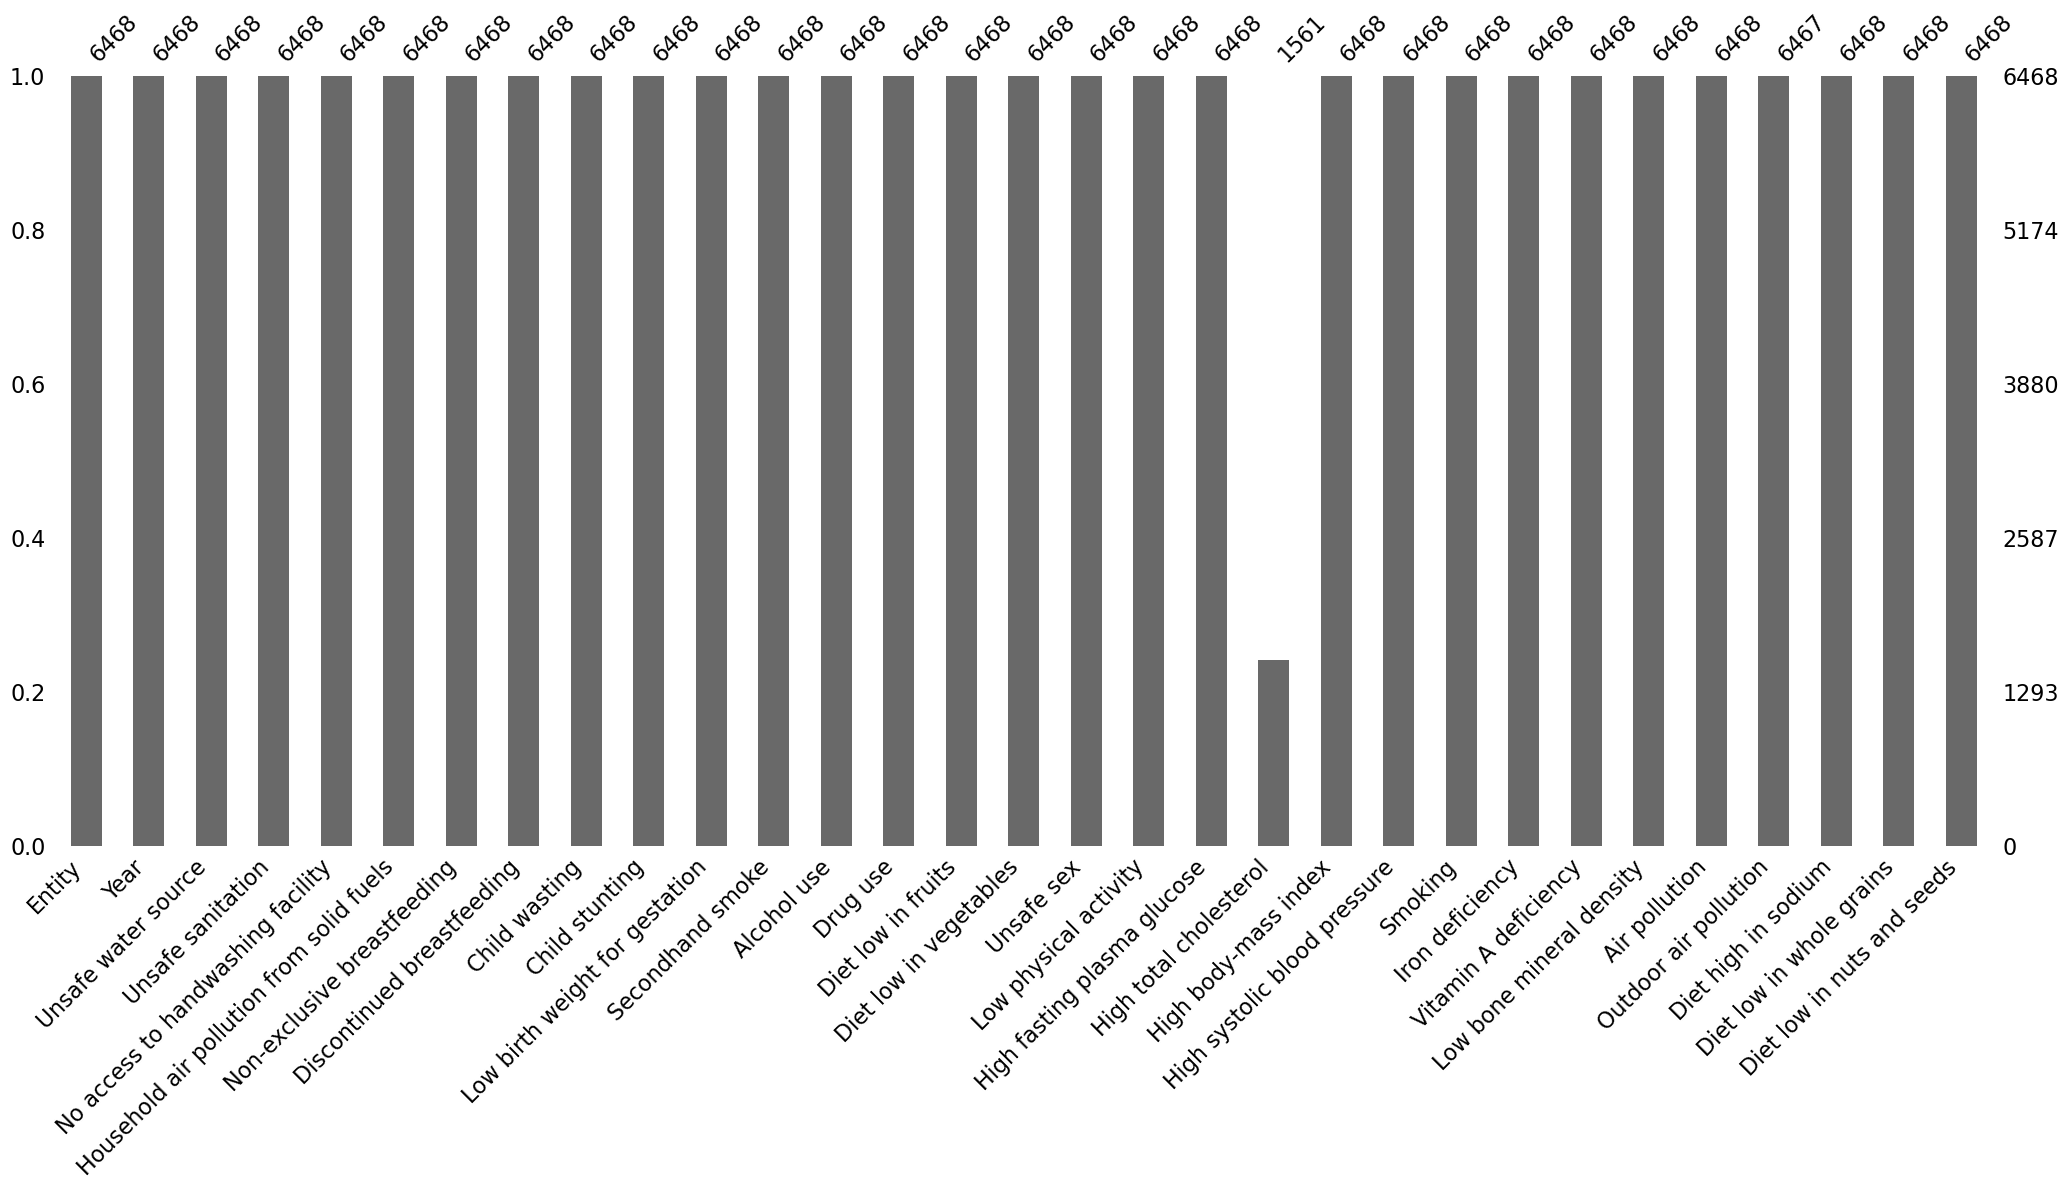

In [5]:
import missingno as msno

#Ver la distribucion de faltantes
msno.bar(datos)

Luego de analizar los campos que tienen datos nulos, considerando las distintas opciones para tratar dicho tipo de datos, se opta por completar los mismos con el valor interpolado entre los valores disponibles

In [6]:
datos['High total cholesterol'].interpolate(inplace=True)

In [7]:
datos['Outdoor air pollution'].interpolate(inplace=True)

Luego de revisar la descripción obtenida, se formatearán los números para una mejor lectura, y se ampliará el valor máximo de columnas para poder visualizar la totalidad de columnas del dataset.

#### Descripción del Dataset

In [8]:
pd.options.display.max_columns = 30
pd.set_option('display.float_format',  '{:,.1f}'.format)

In [9]:
datos.describe(include='float64')

,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,Low birth weight for gestation,Secondhand smoke,Alcohol use,Drug use,Diet low in fruits,Diet low in vegetables,Unsafe sex,Low physical activity,High fasting plasma glucose,High total cholesterol,High body-mass index,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
count,"6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0"
mean,"31,566.3","23,374.4","18,933.1","43,084.2","6,231.4",409.1,"43,446.4","11,767.7","30,948.0","24,282.3","50,203.3","8,890.2","45,452.6","28,742.0","26,764.5","21,141.5","99,555.7","51,727.0","68,685.3","174,383.2","133,548.3","1,878.7","11,908.6","4,579.1","95,735.5","55,640.0","54,240.7","53,348.8","34,967.0"
std,"152,773.1","114,493.0","89,810.4","187,734.5","28,517.8","1,875.0","202,236.7","58,248.9","134,294.6","100,256.2","195,822.6","35,415.1","183,428.6","111,660.0","121,709.1","82,216.0","384,033.0","260,072.3","268,134.1","680,991.5","529,931.5","9,011.9","58,801.6","18,884.5","390,933.5","229,849.1","243,437.3","209,715.3","135,943.2"
min,0.0,0.0,0.1,0.0,0.0,0.0,0.1,0.0,0.3,2.9,"-2,315.3",1.2,1.6,0.8,1.0,2.4,21.0,9.5,20.0,21.0,11.7,0.0,0.0,0.4,8.5,4.8,2.7,9.3,5.2
25%,10.2,4.6,16.9,87.6,4.6,0.3,41.4,1.9,144.6,278.1,364.0,92.9,536.0,413.0,136.1,261.6,"2,034.7",936.4,"1,141.4","2,665.3","1,292.9",2.3,1.9,40.6,"1,076.8",553.7,355.6,798.7,553.3
50%,279.0,160.2,252.5,"1,091.7",102.4,6.6,730.3,77.9,"1,220.7","1,196.2","2,803.3",408.6,"2,452.9","1,837.8",831.8,"1,189.4","7,820.2","4,409.8","4,739.7","10,993.3","5,935.8",32.0,70.5,246.8,"6,125.1","2,242.5","1,945.6","3,504.3","2,279.2"
75%,"5,301.7","3,832.3","3,811.4","9,162.0","1,367.8",78.3,"10,234.5","1,971.6","8,708.1","5,963.7","12,891.3","2,170.8","10,521.8","7,612.3","5,949.0","5,694.7","34,704.8","19,523.3","21,601.2","47,322.8","31,638.1",421.4,"2,081.9","1,096.1","22,727.4","12,831.6","9,691.4","14,463.7","10,038.8"
max,"2,111,659.1","1,638,021.2","1,239,519.4","2,708,904.8","514,102.4","34,850.4","3,365,308.6","1,001,277.4","1,976,612.5","1,260,994.2","2,842,854.2","585,348.2","2,423,447.4","1,462,367.4","1,771,140.7","1,263,051.3","6,526,028.2","4,392,505.4","4,724,346.3","10,440,818.5","7,099,111.3","125,242.9","986,995.0","327,314.3","4,895,476.0","3,408,877.6","3,196,514.3","3,065,588.5","2,062,521.7"


Luego del análisis de la salida, se detectó que en la columna "Consumo de alcohol" existen valores negativos, lo cual carecería de sentido, se estudiará esta columna en detalle

In [10]:
datos_negativos = datos.loc[datos['Alcohol use'] < 0 ]

In [11]:
pais = datos_negativos['Entity']
anio = datos_negativos['Year'] 
alcohol = datos_negativos['Alcohol use']
reducido = pd.concat([pais, anio, alcohol], axis=1)

In [12]:
pd.options.display.max_rows = 100
print(reducido)

               Entity  Year  Alcohol use
1848          England  1990     -2,315.3
1849          England  1991     -1,529.1
1850          England  1992       -789.5
1932          Estonia  1990       -210.0
1933          Estonia  1991       -147.7
1934          Estonia  1992        -44.6
2660          Iceland  1990        -36.8
2661          Iceland  1991        -37.2
2662          Iceland  1992        -37.3
2663          Iceland  1993        -37.3
2664          Iceland  1994        -38.0
2665          Iceland  1995        -34.7
2666          Iceland  1996        -35.9
2667          Iceland  1997        -33.8
2668          Iceland  1998        -30.4
2669          Iceland  1999        -27.3
2670          Iceland  2000        -24.0
2671          Iceland  2001        -22.1
2672          Iceland  2002        -20.4
2673          Iceland  2003        -17.3
2674          Iceland  2004        -14.1
2675          Iceland  2005        -10.6
2676          Iceland  2006         -7.6
2677          Ic

Los datos negativos se reemplazarán por el valor 0

In [13]:
datos.loc[datos['Alcohol use'] < 0, 'Alcohol use'] = 0

In [14]:
datos.describe(include='float64')


,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,Low birth weight for gestation,Secondhand smoke,Alcohol use,Drug use,Diet low in fruits,Diet low in vegetables,Unsafe sex,Low physical activity,High fasting plasma glucose,High total cholesterol,High body-mass index,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
count,"6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0"
mean,"31,566.3","23,374.4","18,933.1","43,084.2","6,231.4",409.1,"43,446.4","11,767.7","30,948.0","24,282.3","50,205.5","8,890.2","45,452.6","28,742.0","26,764.5","21,141.5","99,555.7","51,727.0","68,685.3","174,383.2","133,548.3","1,878.7","11,908.6","4,579.1","95,735.5","55,640.0","54,240.7","53,348.8","34,967.0"
std,"152,773.1","114,493.0","89,810.4","187,734.5","28,517.8","1,875.0","202,236.7","58,248.9","134,294.6","100,256.2","195,822.0","35,415.1","183,428.6","111,660.0","121,709.1","82,216.0","384,033.0","260,072.3","268,134.1","680,991.5","529,931.5","9,011.9","58,801.6","18,884.5","390,933.5","229,849.1","243,437.3","209,715.3","135,943.2"
min,0.0,0.0,0.1,0.0,0.0,0.0,0.1,0.0,0.3,2.9,0.0,1.2,1.6,0.8,1.0,2.4,21.0,9.5,20.0,21.0,11.7,0.0,0.0,0.4,8.5,4.8,2.7,9.3,5.2
25%,10.2,4.6,16.9,87.6,4.6,0.3,41.4,1.9,144.6,278.1,364.0,92.9,536.0,413.0,136.1,261.6,"2,034.7",936.4,"1,141.4","2,665.3","1,292.9",2.3,1.9,40.6,"1,076.8",553.7,355.6,798.7,553.3
50%,279.0,160.2,252.5,"1,091.7",102.4,6.6,730.3,77.9,"1,220.7","1,196.2","2,803.3",408.6,"2,452.9","1,837.8",831.8,"1,189.4","7,820.2","4,409.8","4,739.7","10,993.3","5,935.8",32.0,70.5,246.8,"6,125.1","2,242.5","1,945.6","3,504.3","2,279.2"
75%,"5,301.7","3,832.3","3,811.4","9,162.0","1,367.8",78.3,"10,234.5","1,971.6","8,708.1","5,963.7","12,891.3","2,170.8","10,521.8","7,612.3","5,949.0","5,694.7","34,704.8","19,523.3","21,601.2","47,322.8","31,638.1",421.4,"2,081.9","1,096.1","22,727.4","12,831.6","9,691.4","14,463.7","10,038.8"
max,"2,111,659.1","1,638,021.2","1,239,519.4","2,708,904.8","514,102.4","34,850.4","3,365,308.6","1,001,277.4","1,976,612.5","1,260,994.2","2,842,854.2","585,348.2","2,423,447.4","1,462,367.4","1,771,140.7","1,263,051.3","6,526,028.2","4,392,505.4","4,724,346.3","10,440,818.5","7,099,111.3","125,242.9","986,995.0","327,314.3","4,895,476.0","3,408,877.6","3,196,514.3","3,065,588.5","2,062,521.7"


### Modificación del Dataset

Analizando la descripción obtenida se aprecia que hay mucha diferencia entre la media y el percentil 50, luego de recorrer algunos valores se observó que el dataset contiene datos individuales de países y también por zonas, y continentes. Para poder realizar un análisis comparativo se transformarán las columnas a relativas en función de los totales por fila.

A continuación se creará un campo que sume todas las causas de muerte.

In [15]:
datos['Total_muertes']=(datos['Unsafe water source'] 
                        + datos['Unsafe sanitation'] 
                        + datos['No access to handwashing facility']
                        + datos['Household air pollution from solid fuels']
                        + datos['Non-exclusive breastfeeding']
                        + datos['Discontinued breastfeeding']
                        + datos['Child wasting']
                        + datos['Child stunting']
                        + datos['Low birth weight for gestation']
                        + datos['Secondhand smoke']
                        + datos['Alcohol use']
                        + datos['Drug use']
                        + datos['Diet low in fruits']
                        + datos['Diet low in vegetables']
                        + datos['Unsafe sex']
                        + datos['Low physical activity']
                        + datos['High fasting plasma glucose']
                        + datos['High total cholesterol']
                        + datos['High body-mass index']
                        + datos['High systolic blood pressure']
                        + datos['Smoking']
                        + datos['Iron deficiency']
                        + datos['Vitamin A deficiency']
                        + datos['Low bone mineral density']
                        + datos['Air pollution']
                        + datos['Outdoor air pollution']
                        + datos['Diet high in sodium']
                        + datos['Diet low in whole grains']
                        + datos['Diet low in nuts and seeds']
                       )

In [16]:
datos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 32 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Entity                                    6468 non-null   object 
 1   Year                                      6468 non-null   int64  
 2   Unsafe water source                       6468 non-null   float64
 3   Unsafe sanitation                         6468 non-null   float64
 4   No access to handwashing facility         6468 non-null   float64
 5   Household air pollution from solid fuels  6468 non-null   float64
 6   Non-exclusive breastfeeding               6468 non-null   float64
 7   Discontinued breastfeeding                6468 non-null   float64
 8   Child wasting                             6468 non-null   float64
 9   Child stunting                            6468 non-null   float64
 10  Low birth weight for gestation      

In [17]:
datos.describe(include='float64')


,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,Low birth weight for gestation,Secondhand smoke,Alcohol use,Drug use,Diet low in fruits,Diet low in vegetables,Unsafe sex,Low physical activity,High fasting plasma glucose,High total cholesterol,High body-mass index,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds,Total_muertes
count,"6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0","6,468.0"
mean,"31,566.3","23,374.4","18,933.1","43,084.2","6,231.4",409.1,"43,446.4","11,767.7","30,948.0","24,282.3","50,205.5","8,890.2","45,452.6","28,742.0","26,764.5","21,141.5","99,555.7","51,727.0","68,685.3","174,383.2","133,548.3","1,878.7","11,908.6","4,579.1","95,735.5","55,640.0","54,240.7","53,348.8","34,967.0","1,255,437.3"
std,"152,773.1","114,493.0","89,810.4","187,734.5","28,517.8","1,875.0","202,236.7","58,248.9","134,294.6","100,256.2","195,822.0","35,415.1","183,428.6","111,660.0","121,709.1","82,216.0","384,033.0","260,072.3","268,134.1","680,991.5","529,931.5","9,011.9","58,801.6","18,884.5","390,933.5","229,849.1","243,437.3","209,715.3","135,943.2","4,875,285.1"
min,0.0,0.0,0.1,0.0,0.0,0.0,0.1,0.0,0.3,2.9,0.0,1.2,1.6,0.8,1.0,2.4,21.0,9.5,20.0,21.0,11.7,0.0,0.0,0.4,8.5,4.8,2.7,9.3,5.2,146.0
25%,10.2,4.6,16.9,87.6,4.6,0.3,41.4,1.9,144.6,278.1,364.0,92.9,536.0,413.0,136.1,261.6,"2,034.7",936.4,"1,141.4","2,665.3","1,292.9",2.3,1.9,40.6,"1,076.8",553.7,355.6,798.7,553.3,"20,942.8"
50%,279.0,160.2,252.5,"1,091.7",102.4,6.6,730.3,77.9,"1,220.7","1,196.2","2,803.3",408.6,"2,452.9","1,837.8",831.8,"1,189.4","7,820.2","4,409.8","4,739.7","10,993.3","5,935.8",32.0,70.5,246.8,"6,125.1","2,242.5","1,945.6","3,504.3","2,279.2","98,874.5"
75%,"5,301.7","3,832.3","3,811.4","9,162.0","1,367.8",78.3,"10,234.5","1,971.6","8,708.1","5,963.7","12,891.3","2,170.8","10,521.8","7,612.3","5,949.0","5,694.7","34,704.8","19,523.3","21,601.2","47,322.8","31,638.1",421.4,"2,081.9","1,096.1","22,727.4","12,831.6","9,691.4","14,463.7","10,038.8","369,136.3"
max,"2,111,659.1","1,638,021.2","1,239,519.4","2,708,904.8","514,102.4","34,850.4","3,365,308.6","1,001,277.4","1,976,612.5","1,260,994.2","2,842,854.2","585,348.2","2,423,447.4","1,462,367.4","1,771,140.7","1,263,051.3","6,526,028.2","4,392,505.4","4,724,346.3","10,440,818.5","7,099,111.3","125,242.9","986,995.0","327,314.3","4,895,476.0","3,408,877.6","3,196,514.3","3,065,588.5","2,062,521.7","67,719,243.7"


In [18]:
columnas = ['Unsafe water source', 
'Unsafe sanitation',
'No access to handwashing facility',
'Household air pollution from solid fuels',
'Non-exclusive breastfeeding', 
'Discontinued breastfeeding',
'Child wasting', 
'Child stunting', 
'Low birth weight for gestation',
'Secondhand smoke', 
'Alcohol use', 
'Drug use', 
'Diet low in fruits',
'Diet low in vegetables', 
'Unsafe sex', 
'Low physical activity',
'High fasting plasma glucose', 
'High total cholesterol',
'High body-mass index', 
'High systolic blood pressure', 
'Smoking',
'Iron deficiency', 
'Vitamin A deficiency', 
'Low bone mineral density',
'Air pollution', 
'Outdoor air pollution', 
'Diet high in sodium',
'Diet low in whole grains', 
'Diet low in nuts and seeds']


In [19]:
for columna in columnas:
    datos[columna] = datos[columna] / datos['Total_muertes']


In [20]:
pd.set_option('display.float_format',  '{:,.4f}'.format)

In [21]:
datos.drop('Total_muertes', axis=1, inplace=True)

In [22]:
datos.describe(include='float64')

,Unsafe water source,Unsafe sanitation,No access to handwashing facility,Household air pollution from solid fuels,Non-exclusive breastfeeding,Discontinued breastfeeding,Child wasting,Child stunting,Low birth weight for gestation,Secondhand smoke,Alcohol use,Drug use,Diet low in fruits,Diet low in vegetables,Unsafe sex,Low physical activity,High fasting plasma glucose,High total cholesterol,High body-mass index,High systolic blood pressure,Smoking,Iron deficiency,Vitamin A deficiency,Low bone mineral density,Air pollution,Outdoor air pollution,Diet high in sodium,Diet low in whole grains,Diet low in nuts and seeds
count,"6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000","6,468.0000"
mean,0.0220,0.0164,0.0146,0.0297,0.0050,0.0004,0.0359,0.0086,0.0265,0.0157,0.0362,0.0062,0.0293,0.0227,0.0327,0.0178,0.1015,0.0653,0.0710,0.1392,0.0902,0.0016,0.0098,0.0032,0.0626,0.0336,0.0300,0.0430,0.0294
std,0.0311,0.0239,0.0210,0.0283,0.0068,0.0005,0.0508,0.0139,0.0244,0.0064,0.0256,0.0042,0.0119,0.0095,0.0682,0.0093,0.0423,0.0572,0.0379,0.0491,0.0514,0.0021,0.0168,0.0022,0.0203,0.0167,0.0217,0.0167,0.0122
min,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000,0.0001,0.0003,0.0001,0.0000,0.0004,0.0021,0.0000,0.0015,0.0024,0.0021,0.0000,0.0000,0.0001,0.0004,0.0004,0.0004,0.0007,0.0006
25%,0.0002,0.0001,0.0004,0.0021,0.0001,0.0000,0.0011,0.0001,0.0037,0.0108,0.0132,0.0034,0.0210,0.0152,0.0036,0.0094,0.0700,0.0299,0.0376,0.0991,0.0530,0.0000,0.0000,0.0016,0.0470,0.0188,0.0137,0.0304,0.0196
50%,0.0035,0.0020,0.0029,0.0212,0.0015,0.0001,0.0097,0.0012,0.0189,0.0149,0.0344,0.0054,0.0287,0.0234,0.0077,0.0181,0.1002,0.0642,0.0756,0.1536,0.0821,0.0005,0.0012,0.0026,0.0594,0.0341,0.0254,0.0456,0.0312
75%,0.0357,0.0265,0.0220,0.0552,0.0079,0.0006,0.0537,0.0113,0.0461,0.0200,0.0541,0.0080,0.0376,0.0299,0.0238,0.0255,0.1322,0.0888,0.0968,0.1775,0.1267,0.0026,0.0115,0.0042,0.0751,0.0445,0.0397,0.0553,0.0385
max,0.1350,0.1060,0.0828,0.1108,0.0365,0.0050,0.3049,0.0829,0.1422,0.0400,0.1362,0.0403,0.0641,0.0450,0.5495,0.0404,0.2255,0.9877,0.1817,0.2470,0.2688,0.0108,0.0939,0.0148,0.1368,0.0813,0.1170,0.0820,0.0600


#### Creación de subsets Argentina y Datos Mundiales

In [23]:
datos_argentina = datos.loc[datos['Entity'] == 'Argentina']
datos_argentina.set_index('Year', inplace=True)
datos_reducidos_A = datos_argentina[columnas].T
#Creación de subset de Argentina

In [24]:
datos_mundo = datos.loc[datos['Entity'] == 'World']
datos_mundo.set_index('Year', inplace=True)
#Creación de subset de datos mundiales

#### Elección de las principales columnas

In [25]:
for a in datos_reducidos_A.columns:
  por_anio = datos_reducidos_A[a]
  print(por_anio.sort_values(ascending=False).head(6))
    
#A continuación se presentarán para cada año, las 6 causas de muerte más importantes, analizando las mismas 
#para agrupar las restantes en un campo común.

Smoking                        0.1664
High fasting plasma glucose    0.1201
High systolic blood pressure   0.1099
High total cholesterol         0.0915
Diet low in whole grains       0.0663
High body-mass index           0.0660
Name: 1990, dtype: float64
Smoking                        0.1639
High fasting plasma glucose    0.1213
High systolic blood pressure   0.1101
High total cholesterol         0.0909
High body-mass index           0.0689
Diet low in whole grains       0.0657
Name: 1991, dtype: float64
Smoking                        0.1624
High fasting plasma glucose    0.1235
High systolic blood pressure   0.1111
High total cholesterol         0.0882
High body-mass index           0.0722
Diet low in whole grains       0.0655
Name: 1992, dtype: float64
Smoking                        0.1607
High fasting plasma glucose    0.1253
High systolic blood pressure   0.1116
High total cholesterol         0.0882
High body-mass index           0.0753
Diet low in whole grains       0.0647
Name: 1

Luego de analizar las causas por año, se aprecia que las siguientes explican aproximadamente el 60% del total, por lo que se detallará su análisis, y el resto de las causas se agruparan en un campo nuevo

* Smoking
* High fasting plasma glucose
* High systolic blood pressure
* High total cholesterol
* Diet low in whole grains
* High body-mass index
* Air pollution



In [26]:
columnas_a_agrupar = ['Unsafe water source',
'Unsafe sanitation',
'No access to handwashing facility',
'Household air pollution from solid fuels',
'Non-exclusive breastfeeding',
'Discontinued breastfeeding',
'Child wasting',
'Child stunting',
'Low birth weight for gestation',
'Secondhand smoke',
'Alcohol use',
'Drug use',
'Diet low in fruits',
'Diet low in vegetables',
'Unsafe sex',
'Low physical activity',
'Iron deficiency',
'Vitamin A deficiency',
'Low bone mineral density',
'Outdoor air pollution',
'Diet high in sodium',
'Diet low in nuts and seeds']

In [27]:
datos['Causas_Varias']=(datos['Unsafe water source']
                        + datos['Unsafe sanitation']
                        + datos['No access to handwashing facility']
                        + datos['Household air pollution from solid fuels']
                        + datos['Non-exclusive breastfeeding']
                        + datos['Discontinued breastfeeding']
                        + datos['Child wasting']
                        + datos['Low birth weight for gestation']
                        + datos['Secondhand smoke']
                        + datos['Alcohol use']
                        + datos['Drug use']
                        + datos['Diet low in fruits']
                        + datos['Diet low in vegetables']
                        + datos['Unsafe sanitation']
                        + datos['Low physical activity']
                        + datos['Iron deficiency']
                        + datos['Vitamin A deficiency']
                        + datos['Low bone mineral density']
                        + datos['Outdoor air pollution']
                        + datos['Diet high in sodium']
                        + datos['Diet low in nuts and seeds'])


In [28]:
datos.drop(columnas_a_agrupar, axis=1, inplace=True)

In [29]:
datos_argentina = datos.loc[datos['Entity'] == 'Argentina']
datos_argentina.set_index('Year', inplace=True)
datos_argentina

,Entity,High fasting plasma glucose,High total cholesterol,High body-mass index,High systolic blood pressure,Smoking,Air pollution,Diet low in whole grains,Causas_Varias
Year,,,,,,,,,
1990,Argentina,0.1201,0.0915,0.0660,0.1099,0.1664,0.0459,0.0663,0.3266
1991,Argentina,0.1213,0.0909,0.0689,0.1101,0.1639,0.0471,0.0657,0.3241
1992,Argentina,0.1235,0.0882,0.0722,0.1111,0.1624,0.0479,0.0655,0.3204
1993,Argentina,0.1253,0.0882,0.0753,0.1116,0.1607,0.0484,0.0647,0.3163
1994,Argentina,0.1262,0.0887,0.0783,0.1115,0.1602,0.0486,0.0636,0.3125
1995,Argentina,0.1275,0.0869,0.0810,0.1120,0.1597,0.0488,0.0627,0.3098
1996,Argentina,0.1279,0.0850,0.0837,0.1117,0.1603,0.0500,0.0617,0.3073
1997,Argentina,0.1289,0.0835,0.0863,0.1112,0.1612,0.0515,0.0606,0.3041
1998,Argentina,0.1311,0.0816,0.0892,0.1116,0.1610,0.0526,0.0598,0.3009


## Análisis del Dataset
### Presentación gráfica de las columnas seleccionadas

<Axes: xlabel='Year'>

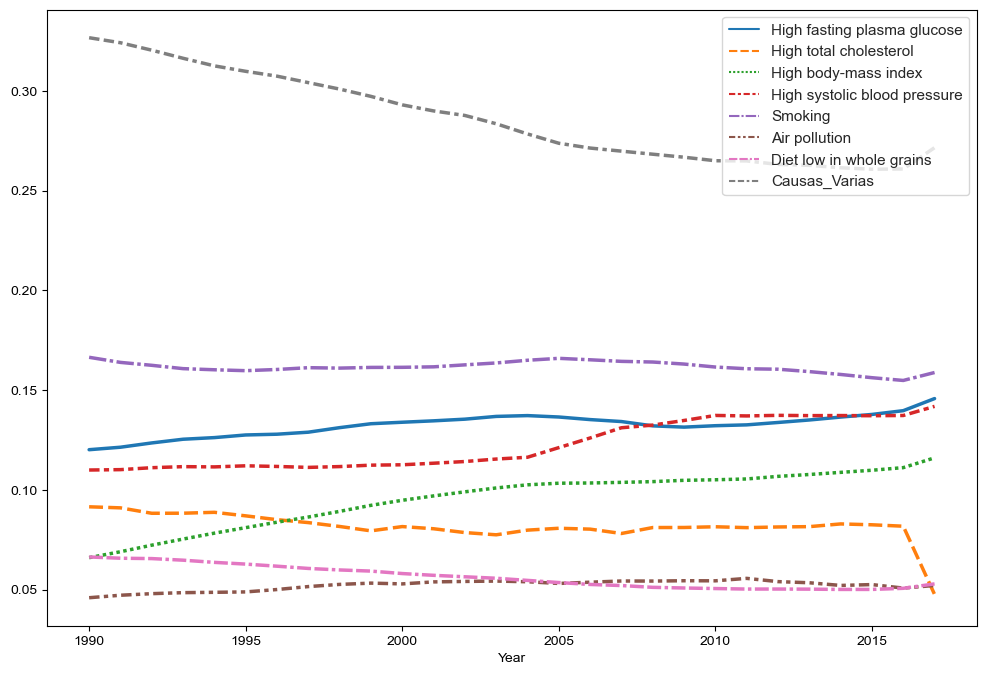

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize = (12, 8))
sns.set_theme(style="whitegrid")

sns.lineplot(data=datos_argentina, palette="tab10", linewidth=2.5, ax=ax)

In [31]:
datos_mundo = datos.loc[datos['Entity'] == 'World']
datos_mundo.set_index('Year', inplace=True)
datos_mundo

,Entity,High fasting plasma glucose,High total cholesterol,High body-mass index,High systolic blood pressure,Smoking,Air pollution,Diet low in whole grains,Causas_Varias
Year,,,,,,,,,
1990,World,0.0598,0.0533,0.0376,0.1197,0.0988,0.0816,0.0374,0.5149
1991,World,0.0604,0.0540,0.0383,0.1203,0.0993,0.0813,0.0376,0.5106
1992,World,0.0613,0.0547,0.0392,0.1212,0.1000,0.0809,0.0381,0.5050
1993,World,0.0624,0.0550,0.0407,0.1229,0.1010,0.0800,0.0388,0.4980
1994,World,0.0634,0.0556,0.0419,0.1240,0.1016,0.0793,0.0393,0.4920
1995,World,0.0642,0.0565,0.0427,0.1245,0.1019,0.0786,0.0395,0.4873
1996,World,0.0653,0.0570,0.0435,0.1252,0.1022,0.0785,0.0396,0.4822
1997,World,0.0665,0.0573,0.0443,0.1258,0.1024,0.0786,0.0398,0.4774
1998,World,0.0677,0.0575,0.0453,0.1265,0.1027,0.0783,0.0399,0.4726


<Axes: xlabel='Year'>

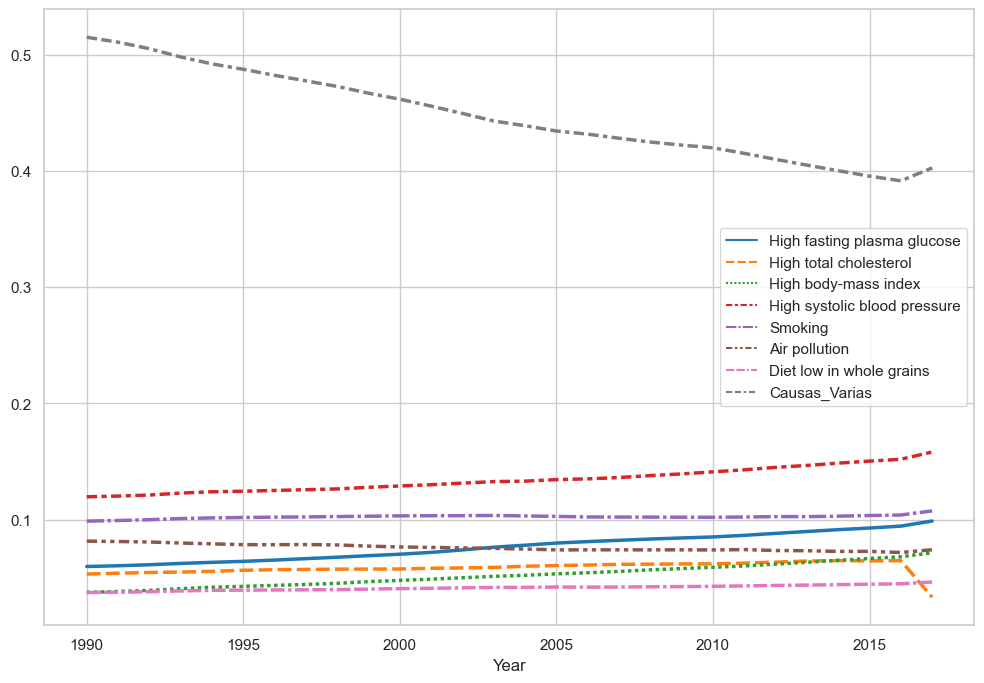

In [32]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.set_theme(style="whitegrid")
sns.lineplot(data=datos_mundo, palette="tab10", linewidth=2.5, ax=ax)

### Análisis de gráficos

Analizando ambos gráficos, se observa que las causas analizadas para el caso de Argentina, en cuatro casos presentan una disminución
* Smoking
* High total cholesterol
* Diet low in whole grains
* Air pollution

Las otras tres, presentan un aumento
* High fasting plasma glucose
* High systolic blood pressure
* High body-mass index

En el gráfico mundial, se observa un menor porcentaje de participación de las causas detalladas en Argentina, con una tendencia a estabilizar o bajar, salvo las siguientes causas que tienen crecimiento
* High fasting plasma glucose
* High systolic blood pressure
* High body-mass index

Podemos apreciar que coinciden en ambos gráficos las causas con tendencia a subir.

En el caso de Argentina, la mayor causa es 'Smoking', con un 15,88%, y a nivel mundial 'High systolic blood pressure' con un 15,82%.


## Estudio de correlación de variables
### Gráfico de análisis columna a columna

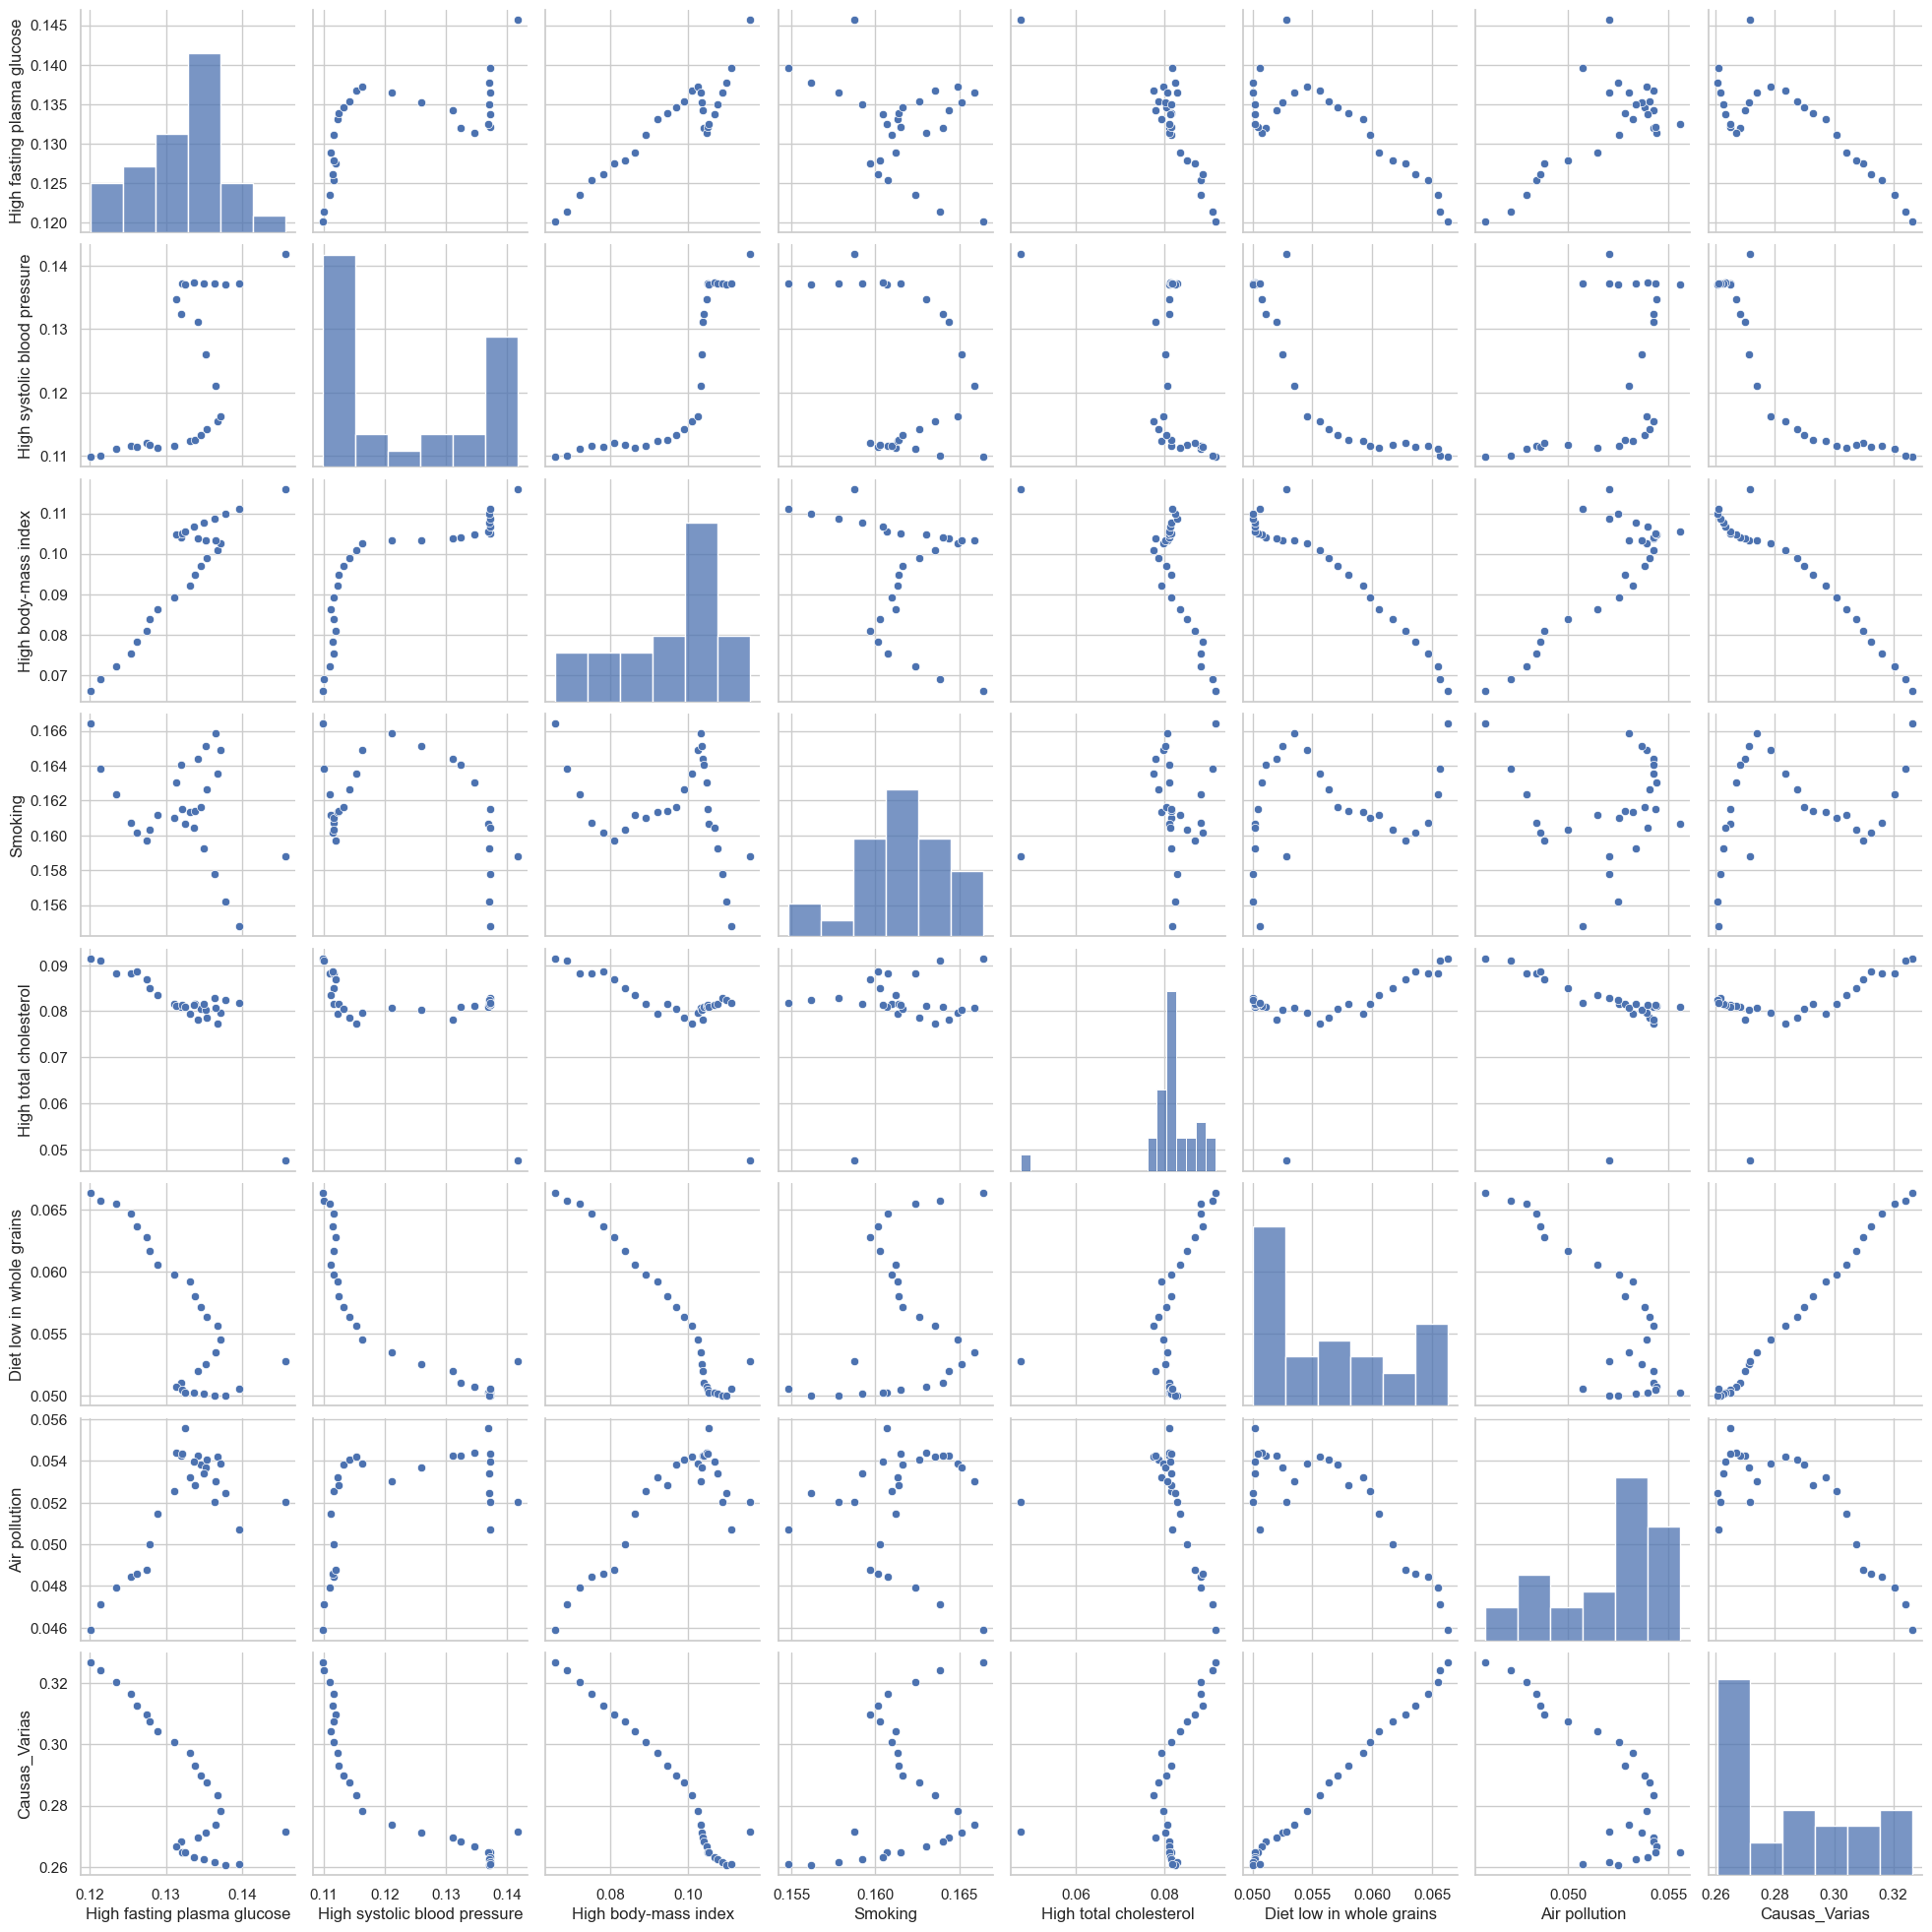

In [33]:
sns.pairplot(datos_argentina, vars=([
    'High fasting plasma glucose',
    'High systolic blood pressure',
    'High body-mass index',
    'Smoking',
    'High total cholesterol',
    'Diet low in whole grains',
    'Air pollution',
    'Causas_Varias'
]))

Luego de analizar los gráficos precedentes, se elige como mejor opción para correlacionar la serie 'High fasting plasma glucose'. A continuación se procederá a obtener una regresión lineal con la librería Statsmodels

### Selección de variables para correlacionar

In [34]:
y = datos_argentina['Smoking']
x1 = datos_argentina['High fasting plasma glucose']


In [35]:
x1

Year
1990   0.1201
1991   0.1213
1992   0.1235
1993   0.1253
1994   0.1262
1995   0.1275
1996   0.1279
1997   0.1289
1998   0.1311
1999   0.1331
2000   0.1339
2001   0.1346
2002   0.1354
2003   0.1368
2004   0.1372
2005   0.1365
2006   0.1352
2007   0.1342
2008   0.1320
2009   0.1314
2010   0.1321
2011   0.1325
2012   0.1337
2013   0.1350
2014   0.1364
2015   0.1378
2016   0.1397
2017   0.1457
Name: High fasting plasma glucose, dtype: float64

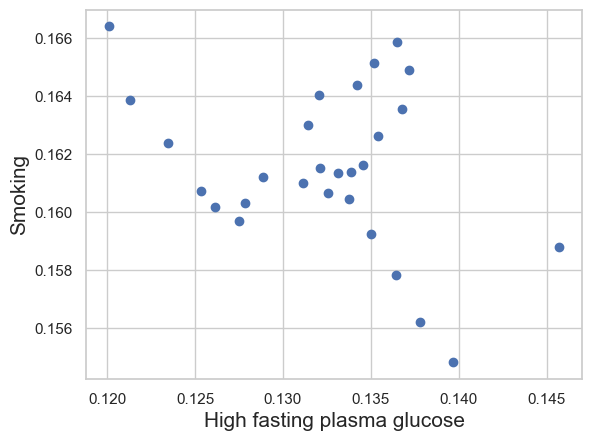

In [36]:
plt.scatter(x1, y)
plt.xlabel('High fasting plasma glucose', fontsize=15)
plt.ylabel('Smoking', fontsize=15)
plt.show()

### Regresión lineal

In [37]:
x = sm.add_constant(x1)
resultados = sm.OLS(y, x).fit()
resultados.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Smoking   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.076
Method:                 Least Squares   F-statistic:                     3.214
Date:                Wed, 26 Jul 2023   Prob (F-statistic):             0.0847
Time:                        13:05:24   Log-Likelihood:                 127.38
No. Observations:                  28   AIC:                            -250.8
Df Residuals:                      26   BIC:                            -248.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                           0.1829      0.012     15.358      0.000       0.158       0.207
High fasting plasma glucose    -0.1612      0.090     -1.793      0.085      -0.346       0.024
==============================================================================
Omnibus:                        0.045   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.978   Jarque-Bera (JB):                0.251
Skew:                           0.039   Prob(JB):                        0.882
Kurtosis:                       2.543   Cond. No.                         182.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Del análisis de los resultados obtenidos, apreciamos que son satisfactorios ya que los valores de P>|t| son cercanos a 0

### Gráfico de variables y recta obtenida

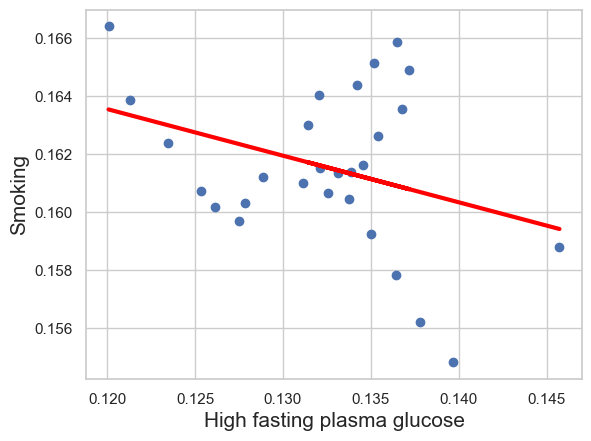

In [38]:
x1 = datos_argentina['High fasting plasma glucose']
plt.scatter(x1,y)
yhat = -0.1612*x1 + 0.1829

fig = plt.plot(x1,yhat, lw=3, c='red', label='Regresión lineal')
plt.xlabel('High fasting plasma glucose', fontsize=15)
plt.ylabel('Smoking', fontsize=15)
plt.show()


## Modelo de predicción
### Selección de datos

In [39]:
datos_argentina = datos_argentina.drop('Entity', axis=1)


### Segmentación de datos de entrenamiento y prueba

In [40]:
from sklearn.model_selection import train_test_split

X = datos_argentina.drop('Smoking', axis=1)
y = datos_argentina['Smoking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Proceso de regresión lineal Scikit-learn

In [41]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

### Proceso de predicción y análisis de resultados

In [42]:
from sklearn.metrics import r2_score, mean_squared_error

y_pred = lr.predict(X_test)
print("R^2:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R^2: 0.9694926440322617
RMSE: 0.0005264994820297599


Analizando los resultados de regresión y predicción obtenidos, podemos concluir que son satisfactorios, ya que el R^2 es muy cercano a 1, y por otro lado el RMSE es un valor muy pequeño, mostrando un error del orden del 0,05% en las predicciones.

### Creación de un dataframe con datos ficticios para prueba del modelo

A continuación se creará un dataframe con datos ficticios en un período de cinco años, con el objetivo de realizar una predicción con el modelo obtenido previamente

In [43]:
datos_fict =({'Year': [2018, 2019, 2020, 2021, 2022],
              'High fasting plasma glucose' : [0.1462, 0.1473, 0.1465, 0.1468, 0.1455],
              'High total cholesterol' : [0.078, 0.0802, 0.085, 0.09, 0.085],
              'High body-mass index' : [0.1185, 0.118, 0.1192, 0.1205, 0.125],
              'High systolic blood pressure' : [0.145, 0.147, 0.1495, 0.1491, 0.1488],
              'Air pollution': [0.04, 0.045, 0.041, 0.044, 0.046],
              'Diet low in whole grains': [0.0545, 0.056, 0.057, 0.0545, 0.055],
              'Causas_Varias': [0.2583, 0.2475, 0.2398, 0.2343, 0.2337]})

X_fict = pd.DataFrame.from_dict(datos_fict)
X_fict.set_index('Year', inplace=True)

In [44]:
X_fict

,High fasting plasma glucose,High total cholesterol,High body-mass index,High systolic blood pressure,Air pollution,Diet low in whole grains,Causas_Varias
Year,,,,,,,
2018,0.1462,0.0780,0.1185,0.1450,0.0400,0.0545,0.2583
2019,0.1473,0.0802,0.1180,0.1470,0.0450,0.0560,0.2475
2020,0.1465,0.0850,0.1192,0.1495,0.0410,0.0570,0.2398
2021,0.1468,0.0900,0.1205,0.1491,0.0440,0.0545,0.2343
2022,0.1455,0.0850,0.1250,0.1488,0.0460,0.0550,0.2337


In [45]:
y_pred2 = lr.predict(X_fict)

y_pred2

array([0.13733387, 0.13855934, 0.13758961, 0.13883541, 0.1334102 ])

In [46]:
X_complementario = X_fict
X_complementario.insert(loc=4,
                                column='Smoking',
                                value=y_pred2)


In [47]:
X_complementario

,High fasting plasma glucose,High total cholesterol,High body-mass index,High systolic blood pressure,Smoking,Air pollution,Diet low in whole grains,Causas_Varias
Year,,,,,,,,
2018,0.1462,0.0780,0.1185,0.1450,0.1373,0.0400,0.0545,0.2583
2019,0.1473,0.0802,0.1180,0.1470,0.1386,0.0450,0.0560,0.2475
2020,0.1465,0.0850,0.1192,0.1495,0.1376,0.0410,0.0570,0.2398
2021,0.1468,0.0900,0.1205,0.1491,0.1388,0.0440,0.0545,0.2343
2022,0.1455,0.0850,0.1250,0.1488,0.1334,0.0460,0.0550,0.2337


A continuación se graficarán el dataframe original, el dataframe de datos ficticios y la predicción

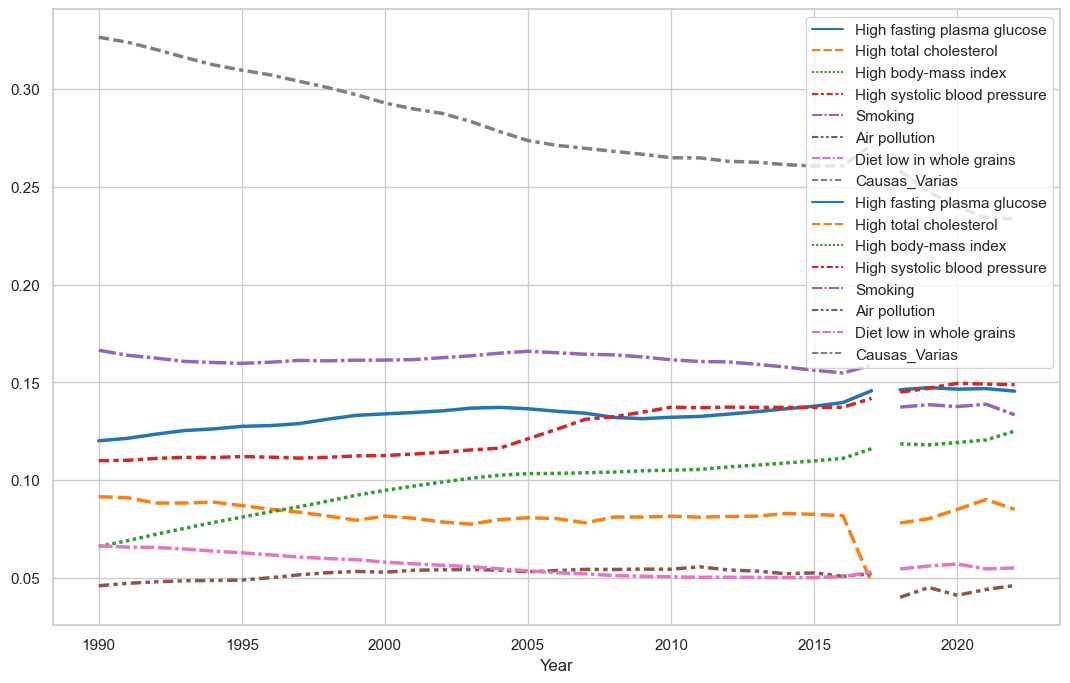

In [50]:
ax = plt.subplots(figsize = (13, 8))

ax = sns.lineplot(data=datos_argentina, palette="tab10", linewidth=2.5)
ax = sns.lineplot(data=X_complementario, palette="tab10", linewidth=2.5)

plt.show()

En el gráfico precedente se observa que la predicción se encuentra por debajo de la gráfica de la serie original. Esto puede originarse en que los datos utilizados para la predicción son ficticios, no respondiendo a la real distribución de estos. 